### Importy

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Fraktale samopodobne

## Trójkąt Sierpińskiego

In [2]:
def sierpinski_triangle(points, n):
    if n == 0:
        return [points]

    # Wyznacz punkty podziału
    mid1 = ((points[0][0] + points[1][0]) / 2, (points[0][1] + points[1][1]) / 2)
    mid2 = ((points[1][0] + points[2][0]) / 2, (points[1][1] + points[2][1]) / 2)
    mid3 = ((points[0][0] + points[2][0]) / 2, (points[0][1] + points[2][1]) / 2)
    
    # Podziel trójkąt na 3 mniejsze
    triangles = []
    triangles.extend(sierpinski_triangle([points[0], mid1, mid3], n-1))
    triangles.extend(sierpinski_triangle([points[1], mid1, mid2], n-1))
    triangles.extend(sierpinski_triangle([points[2], mid2, mid3], n-1))

    return triangles

In [38]:
def draw_sierpinski(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        triangles = sierpinski_triangle([(0, 0), (1, 0), (0.5, np.sqrt(3)/2)], i)
        for triangle in triangles:
            triangle = np.array(triangle)
            ax.fill(triangle[:, 0], triangle[:, 1], 'black')
        ax.axis('equal')
        ax.axis('off')

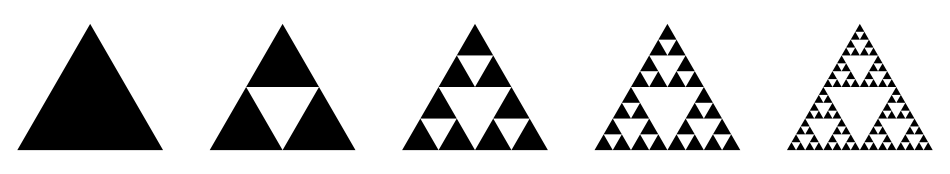

In [37]:
draw_sierpinski(5)

## Dywan Sierpińskiego

In [36]:
def sierpinski_carpet(points, n, s=3):
    if n == 0:
        return [points]
    
    rectangles = []
    
    y_h = (points[2][1] - points[1][1]) / s
    x_h = (points[1][0] - points[0][0]) / s

    for i in range(s):
        for j in range(s):
            if i != int(s / 2) or j != int(s/2):
               rectangles.extend(sierpinski_carpet([(points[0][0] + i * x_h, points[0][1] + j * y_h), (points[0][0] + (i + 1) * x_h, points[0][1] + j * y_h), (points[0][0] + (i + 1) * x_h, points[0][1] + (j + 1) * y_h), (points[0][0] + i * x_h, points[0][1] + (j + 1) * y_h)], n-1))

    return rectangles

In [20]:
def draw_sierpinski(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        rectangles = sierpinski_carpet([(0, 0), (1, 0), (1, 1), (0, 1)], i)
        for rectangle in rectangles:
            rectangle = np.array(rectangle)
            ax.fill(rectangle[:, 0], rectangle[:, 1], 'black')
        ax.axis('equal')
        ax.axis('off')

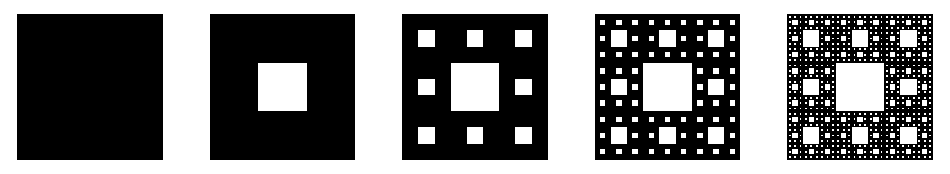

In [37]:
draw_sierpinski(5)

## Krzywa Kocha

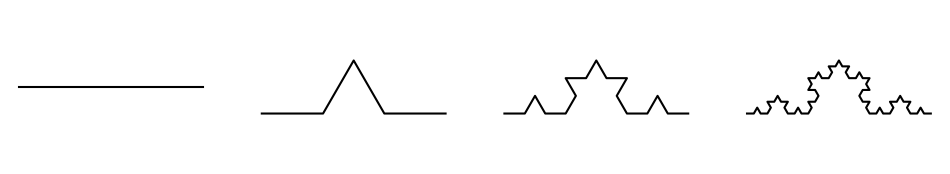

In [6]:
def koch_curve(points, n):
    """
    Generuje punkty krzywej Kocha.
    
    Args:
    - points (list): lista punktów startowych.
    - n (int): liczba iteracji.
    
    Returns:
    - list: punkty krzywej Kocha po n iteracjach.
    """
    if n == 0:
        return points
    else:
        new_points = []
        for i in range(len(points) - 1):
            p1 = points[i]
            p2 = points[i+1]
            
            # Oblicz punkty podziału
            delta_x = p2[0] - p1[0]
            delta_y = p2[1] - p1[1]

            pA = (2*p1[0] + p2[0]) / 3, (2*p1[1] + p2[1]) / 3
            pB = (p1[0] + 2*p2[0]) / 3, (p1[1] + 2*p2[1]) / 3
            pC = (p1[0] + 0.5*delta_x - (np.sqrt(3)/6)*delta_y, p1[1] + 0.5*delta_y + (np.sqrt(3)/6)*delta_x)

            new_points.extend([p1, pA, pC, pB])
        new_points.append(points[-1])
        return koch_curve(new_points, n-1)


def draw_koch_curve(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        points = [(0, 0), (1, 0)]
        koch_points = koch_curve(points, i)
        x, y = zip(*koch_points)
        ax.plot(x, y, 'black')
        ax.axis('equal')
        ax.axis('off')



# Rysuj krzywą Kocha dla 4 iteracji
draw_koch_curve(4)

# Fraktale samoafiniczne

## Paprotka Barnsleya

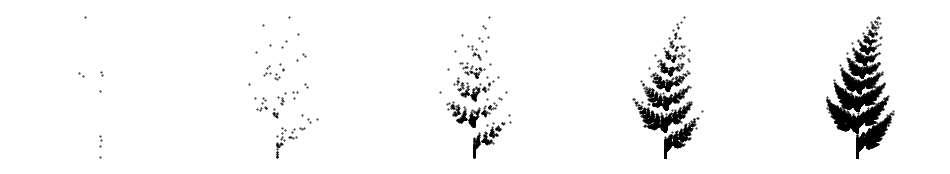

In [18]:
import matplotlib.pyplot as plt
import random


def barnsley_fern(points):
    p1 = max(np.linalg.eig([[0,0],[0,0.16]])[0]**(0.5))
    p2 = max(np.linalg.eig([[0.85,0.04],[-0.04,0.85]])[0]**(0.5))
    p3 = max(abs(np.linalg.eig([[0.2,-0.26],[-0.23, 0.22]])[0])**(0.5))
    p4 = max(abs(np.linalg.eig([[-0.15,0.28],[0.26, 0.24]])[0])**(0.5))

    pp1 = p1/(p1+p2+p3+p4)
    pp2 = (p1 + p2)/(p1+p2+p3+p4)
    pp3 = (p1 + p2 + p3)/(p1+p2+p3+p4)
    pp4 = (p1 + p2 + p3 + p4)/(p1+p2+p3+p4)
    
    
    def f1(x, y):
        return (0., 0.16*y)

    def f2(x, y):
        return (0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6)

    def f3(x, y):
        return (0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6)

    def f4(x, y):
        return (-0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44)

    x, y = 0, 0
    x_list = []
    y_list = []
    
    for _ in range(points):
        p = random.random()

        if p < pp1:
            func = f1
        elif p < pp2:
            func = f2
        elif p < pp3:
            func = f3
        else:
            func = f4
            
        x, y = func(x, y)
        x_list.append(x)
        y_list.append(y)
        
    return [x_list, y_list]

def draw_barnsley_fern(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        points = (10 ** i) * 10
        x_list, y_list = barnsley_fern(points)
        ax.scatter(x_list, y_list, s=0.2, color='black')
        ax.axis('equal')
        ax.axis('off')


draw_barnsley_fern(5)

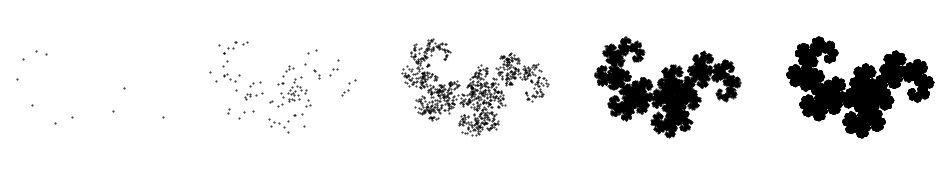

In [25]:
import matplotlib.pyplot as plt
import random


def dragon(points):
    p1 = max(np.linalg.eig([[0.5,0.5],[-0.5,0.5]])[0]**(0.5))
    p2 = max(np.linalg.eig([[-0.5,0.5],[-0.5,-0.5]])[0]**(0.5))

    pp1 = p1/(p1+p2)
    
    def f1(x, y):
        return (0.5*x + 0.5*y - 0.27, -0.5*x + 0.5*y)

    def f2(x, y):
        return (-0.5*x + 0.5*y + 0.14, -0.5*x - 0.5*y)

    
    x, y = 0, 0
    x_list = []
    y_list = []

    for _ in range(points):
        p = random.random()

        if p < pp1:
            func = f1
        else:
            func = f2
            
        x, y = func(x, y)
        x_list.append(x)
        y_list.append(y)
        
    return [x_list, y_list]

def draw_dragon(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        points = (10 ** i) * 10
        x_list, y_list = dragon(points)
        ax.scatter(x_list, y_list, s=0.2, color='black')
        ax.axis('equal')
        ax.axis('off')


draw_dragon(5)

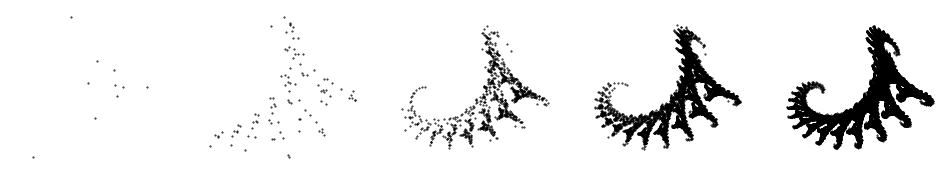

In [27]:
import matplotlib.pyplot as plt
import random


def dragon(points):
    p1 = max(np.linalg.eig([[0.824,0.281],[-0.212,0.86]])[0]**(0.5))
    p2 = max(np.linalg.eig([[0.088,0.521],[-0.463,- 0.377]])[0]**(0.5))

    pp1 = p1/(p1+p2)
    
    def f1(x, y):
        return (0.824*x + 0.281*y - 1.88, -0.212*x + 0.86*y - 0.11)

    def f2(x, y):
        return (0.088*x + 0.521*y + 0.78, -0.463*x - 0.377*y + 8.09)

    
    x, y = 0, 0
    x_list = []
    y_list = []

    for _ in range(points):
        p = random.random()

        if p < pp1:
            func = f1
        else:
            func = f2
            
        x, y = func(x, y)
        x_list.append(x)
        y_list.append(y)
        
    return [x_list, y_list]

def draw_dragon(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        points = (10 ** i) * 10
        x_list, y_list = dragon(points)
        ax.scatter(x_list, y_list, s=0.2, color='black')
        ax.axis('equal')
        ax.axis('off')


draw_dragon(5)

In [ ]:
import numpy as np
from scipy.stats import linregress

def box_counting(X, epsilons):
    """
    Oblicza liczbę boxów potrzebnych do pokrycia punktów w X dla każdej wartości w epsilons.
    """
    counts = []
    min_x, min_y = np.min(X, axis=0)
    max_x, max_y = np.max(X, axis=0)

    for epsilon in epsilons:
        n_boxes_x = int((max_x - min_x) / epsilon) + 1
        n_boxes_y = int((max_y - min_y) / epsilon) + 1

        # Tworzenie siatki boxów
        grid = np.zeros((n_boxes_x, n_boxes_y))

        for point in X:
            x_index = int((point[0] - min_x) / epsilon)
            y_index = int((point[1] - min_y) / epsilon)
            grid[x_index, y_index] = 1
        
        counts.append(np.sum(grid))

    return counts

def plot_reg(logs, logN, slope, intercept):
    
    # Rysowanie punktów
    plt.scatter(logs, logN, color='blue', label='Punkty danych')
    
    # Rysowanie linii regresji
    plt.plot(logs, slope * logs + intercept, color='red', label=f'Regresja: y = {slope:.2f}x + {intercept:.2f}')
    plt.xlabel('log(epsilons)')
    plt.ylabel('log(N)')
    plt.legend()
    plt.title('Regresja liniowa dla wymiaru boxowego')
    plt.show()

def compute_box_dimension(X, epsilons):
    """
    Oblicza wymiar boxowy dla zbioru punktów X.
    """
    N = box_counting(X, epsilons)
    logs = np.log(1/np.array(epsilons))
    logN = np.log(N)

    slope, intercept, _, _, _ = linregress(logs, logN)
    
    plot_reg(logs, logN, slope, intercept)
    
    return slope

# Definiowanie zakresu epsilonów
# epsilony do liczenia wymiaru Minkowskiego
epsilons = []

for i in range(12):
    epsilons = epsilons + [1/(2**i)]

print(epsilons)

# liczba iteracji
n = 10000000
#X = wiener_process(n, 0.01)
T = np.linspace(0, 1, n)
dimension = compute_box_dimension(np.stack((T, X), axis=-1), epsilons)
print("Wymiar boxowy:", dimension)


In [ ]:
import math

def compute_box_dimension_v2(T, X, epsilons):
    counts = []
    eps = []
    
    for epsilon in epsilons:
        intervals = int(1 / epsilon)
        n_points = int(len(X)/intervals)
        count = 0

        for i in range(int(intervals)):
            in_range = int((np.max(X[i*n_points:(i+1)*n_points-1]) - np.min(X[i*n_points:(i+1)*n_points-1])) / epsilon)
            count += in_range

        if count > 0:
            counts.append(count)
            eps.append(epsilon)

    logs = np.log(1/np.array(eps))
    logN = np.log(counts)

    slope, intercept, _, _, _ = linregress(logs, logN)
    
    plot_reg(logs, logN, slope, intercept)
    
    return slope

epsilons = []
for i in range(8):
    epsilons = epsilons + [1/(2**i)]
    
print(epsilons)

# Obliczanie wymiaru boxowego
dimension = compute_box_dimension_v2(T, X, epsilons)
print(f"Wymiar boxowy: {dimension}")

wiener_draw(X)